# Board Games project
<div style="margin-top:5px">This project is an exploration of a board games dataset taken from BoardGameGeek website.</div>
<div>Project is made for Vilnius School of AI</div>
URL: <a href="https://boardgamegeek.com">boardgamegeek.com</a>

## Importing modules

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
from datetime import timedelta

<IPython.core.display.Javascript object>

## Functions

In [3]:
def expsize(games, col, newcolname):
    def deser(partid, part):
        return pd.Series(part, index=[partid] * len(part))

    des = np.vectorize(deser)

    newcol = games[col].str.split(",")
    newcol = newcol.apply(lambda x: [el.strip() for el in x])
    newcol_id = games[col].str.split(",").index.values

    newcolun = pd.concat(des(newcol_id, newcol.values))
    newcolun.name = newcolname
    newcolun = games.merge(newcolun, left_index=True, right_index=True, how="inner")
    newcolun.drop(columns=[col], inplace=True)
    return newcolun


def bar_ch(popvals, hednum, name, xlb, ylb, rot, sort=True, roundc=False, time=False):
    if sort:
        topvals = popvals.sort_values(ascending=False).head(hednum)
    else:
        topvals = popvals

    barvl = sns.barplot(x=topvals.index, y=topvals, color="#8C96DB")
    barvl.spines["top"].set_visible(False)
    barvl.spines["right"].set_visible(False)
    plt.xticks(rotation=rot)
    barvl.set_xlabel(xlb)
    barvl.set_ylabel(ylb)
    barvl.title.set_text(name)

    if time == True:
        barvl.set_yticklabels(
            pd.to_datetime(barvl.get_yticks(), unit="m").strftime("%H:%M")
        )
    ypos = 0
    for rect in topvals:
        disp = rect
        if roundc == True:
            disp = round(rect)
        if time == True:
            disp = pd.to_datetime(rect, unit="m").strftime("%H:%M")
        plt.text(ypos, rect, s=disp, ha="center", va="bottom")
        ypos += 1

<IPython.core.display.Javascript object>

## Importing data set

In [4]:
games = pd.read_csv("games.csv", engine="python")

<IPython.core.display.Javascript object>

## Explore

Types of data:

In [5]:
games.dtypes

rank             int64
bgg_url         object
game_id          int64
names           object
min_players      int64
max_players      int64
avg_time         int64
min_time         int64
max_time         int64
year             int64
avg_rating     float64
geek_rating    float64
num_votes        int64
image_url       object
age              int64
mechanic        object
owned            int64
category        object
designer        object
weight         float64
dtype: object

<IPython.core.display.Javascript object>

Data is mostly numerical but there are categorical columns (category, designer, mechanic, names)

In [6]:
games.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,89130.612523,2.019404,5.188038,116.193639,83.852971,115.717544,1997.739948,6.969392,6.088576,2013.458292,10.407281,3063.863573,2.343633
std,1443.231328,77203.598778,0.685282,7.801038,513.710907,317.251581,513.768868,143.192968,0.562825,0.483212,4750.834210,3.237645,6482.861008,0.808694
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.777730,5.640240,62.000000,0.000000,49.000000,0.000000
25%,1250.500000,11169.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2003.000000,6.540560,5.726970,285.000000,8.000000,626.000000,1.735300
50%,2500.000000,71906.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2010.000000,6.907890,5.905240,625.000000,11.000000,1204.000000,2.285700
75%,3749.500000,160456.500000,2.000000,6.000000,120.000000,90.000000,120.000000,2015.000000,7.339040,6.303585,1634.500000,12.000000,2751.500000,2.888900
max,4999.000000,248949.000000,8.000000,200.000000,22500.000000,17280.000000,22500.000000,2018.000000,9.159150,8.618580,77423.000000,42.000000,111807.000000,4.904800


<IPython.core.display.Javascript object>

**Players:**
   * In average board games are suitable for max 5 players and can be plaeyed by 2 players
   * Game with most players can be played by 200 people
   
**Time:**
   * Average duration of a game is 2 hours
   
**Age:**
   * In average board games are made for players from 10 years old.
   * Game with higest age limit is for players from 42 years old.
   
**Owners:**
   * Most popluar game is owned by 111807 owners

In [7]:
games.head(10)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,8.98893,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66140,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,8.38461,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,8.33954,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518
5,6,https://boardgamegeek.com/boardgame/187645/sta...,187645,Star Wars: Rebellion,2,4,240,180,240,2016,8.47439,8.16545,13336,https://cf.geekdo-images.com/original/img/QT95...,14,"Area Control / Area Influence, Area Movement, ...",20682,"Fighting, Miniatures, Movies / TV / Radio them...",Corey Konieczka,3.6311
6,7,https://boardgamegeek.com/boardgame/169786/scythe,169786,Scythe,1,5,115,90,115,2016,8.29158,8.10800,29219,https://cf.geekdo-images.com/original/img/enxC...,14,"Area Control / Area Influence, Grid Movement, ...",38279,"Civilization, Economic, Fighting, Miniatures, ...",Jamey Stegmaier,3.3609
7,8,https://boardgamegeek.com/boardgame/120677/ter...,120677,Terra Mystica,2,5,150,60,150,2012,8.23703,8.09296,29309,https://cf.geekdo-images.com/original/img/Cynj...,12,"Area Control / Area Influence, Route/Network B...",32637,"Civilization, Economic, Fantasy, Territory Bui...","Jens Drögemüller, Helge Ostertag",3.9505
8,9,https://boardgamegeek.com/boardgame/193738/gre...,193738,Great Western Trail,2,4,150,75,150,2016,8.28574,8.04047,13521,https://cf.geekdo-images.com/original/img/U3Rn...,12,"Deck / Pool Building, Hand Management, Point t...",16869,American West,Alexander Pfister,3.7011
9,10,https://boardgamegeek.com/boardgame/180263/7th...,180263,The 7th Continent,1,4,1000,5,1000,2017,8.67228,8.02458,6057,https://cf.geekdo-images.com/original/img/iQDB...,14,"Co-operative Play, Grid Movement, Hand Managem...",12543,"Adventure, Card Game, Exploration, Horror, Sci...","Ludovic Roudy, Bruno Sautter",2.8578


<IPython.core.display.Javascript object>

## Cleaning

Firstly I remove rows with url:

In [8]:
games.drop(columns=["bgg_url", "image_url"], inplace=True)

<IPython.core.display.Javascript object>

Remove highly correlated columns:

In [9]:
correl = games.corr().unstack().sort_values(ascending=False)
correl = correl[correl < 1]
correl.head(8)

max_time   avg_time     0.999926
avg_time   max_time     0.999926
owned      num_votes    0.984790
num_votes  owned        0.984790
min_time   avg_time     0.659931
avg_time   min_time     0.659931
min_time   max_time     0.659825
max_time   min_time     0.659825
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
games.drop(columns=["max_time", "num_votes", "min_time"], inplace=True)

<IPython.core.display.Javascript object>

## AVG and Geek rating

This line charts compares how AVG rating and geek rating correalates with number of owners.

P.S By BGG website geek rating is based on user votes game popularity and other criterias.

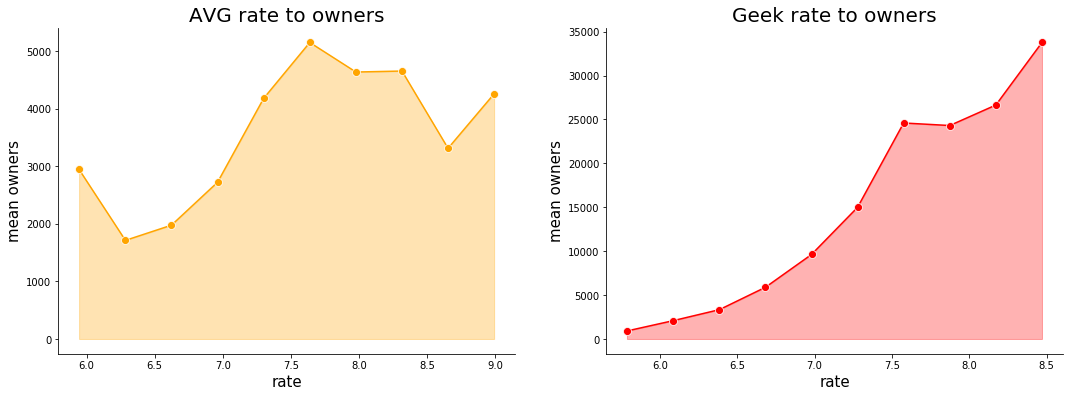

<IPython.core.display.Javascript object>

In [11]:
grp_rait = games
grp_rait["binrate"] = pd.cut(games["avg_rating"], 10)

grp_rait["geekbin"] = pd.cut(games["geek_rating"], 10)

grp_raitcom = grp_rait.groupby("binrate")["owned"].mean()
grp_geekcom = grp_rait.groupby("geekbin")["owned"].mean()


bin_inval = pd.DataFrame(
    {
        "ind": [(a.left + a.right) / 2 for a in grp_raitcom.index],
        "val": grp_raitcom.values,
    }
)
geek_inval = pd.DataFrame(
    {
        "ind": [(a.left + a.right) / 2 for a in grp_geekcom.index],
        "val": grp_geekcom.values,
    }
)


fig, axbo = plt.subplots(1, 2, figsize=(18, 6))

owra = sns.lineplot(
    x="ind",
    y="val",
    data=bin_inval,
    ax=axbo[0],
    marker="o",
    markersize=8,
    color="orange",
)
owra.fill_between(
    bin_inval["ind"].values, bin_inval["val"].values, color="orange", alpha=0.3
)
owge = sns.lineplot(
    x="ind", y="val", data=geek_inval, ax=axbo[1], marker="o", markersize=8, color="red"
)
owge.fill_between(
    geek_inval["ind"].values, geek_inval["val"].values, color="red", alpha=0.3
)

owra.set_xlabel("rate", fontsize=15)
owra.set_ylabel("mean owners", fontsize=15)
owra.set_title("AVG rate to owners", size=20)
owra.spines["top"].set_visible(False)
owra.spines["right"].set_visible(False)

owge.set_xlabel("rate", fontsize=15)
owge.set_ylabel("mean owners", fontsize=15)
owge.set_title("Geek rate to owners", size=20)
owge.spines["top"].set_visible(False)
owge.spines["right"].set_visible(False)

plt.show()
games.drop(columns=["binrate", "geekbin"], inplace=True)

### In result:
We can see that geek raiting represents scucess and popularity of the single game better. While AVG raiting can be used to represet tendency like raiting per year or per genre.

### Games distributed by AVG rating

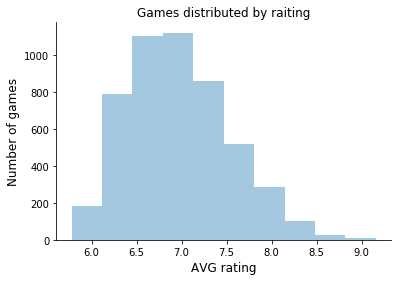

<IPython.core.display.Javascript object>

In [12]:
raitcou = sns.distplot(games["avg_rating"], bins=10, kde=False)
raitcou.set_title("Games distributed by raiting")
raitcou.spines["top"].set_visible(False)
raitcou.spines["right"].set_visible(False)
raitcou.set_xlabel("AVG rating", fontsize=12)
raitcou.set_ylabel("Number of games", fontsize=12)
plt.show()

### In result:
Majority of games are in inerval from 6,5 to 7,5.

## Years

Firstly I remove board games before 1960 because there were not many of them and games after 2017 because data is unfinished.

In [13]:
gamclye = games[(games["year"] >= 1960) & (games["year"] <= 2017)]

<IPython.core.display.Javascript object>

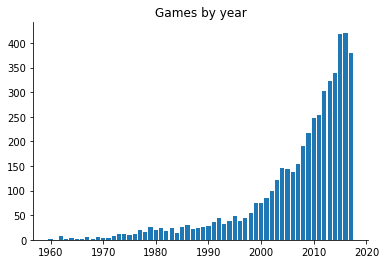

<IPython.core.display.Javascript object>

In [14]:
games_year = gamclye.groupby("year")["names"].count()
fig, axgy = plt.subplots()
axgy.bar(games_year.index, games_year)
axgy.title.set_text("Games by year")
axgy.spines["top"].set_visible(False)
axgy.spines["right"].set_visible(False)
plt.show()

### In result:
It is clear that market of board games is growing.

### More trends by year

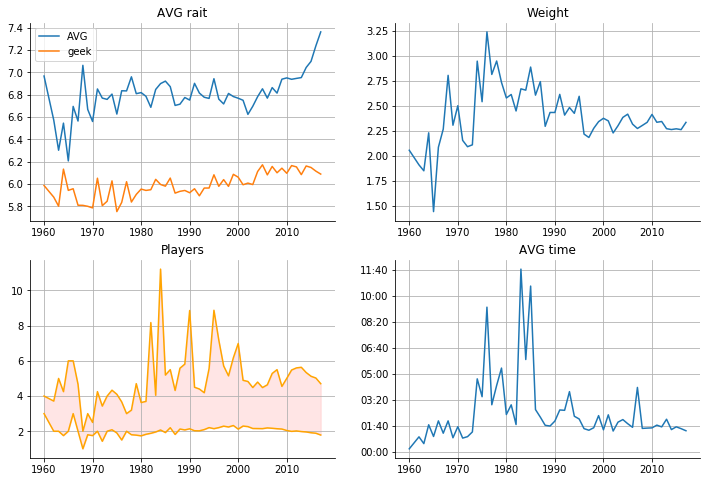

<IPython.core.display.Javascript object>

In [15]:
rait_year = gamclye.groupby("year")["avg_rating"].mean()
geek_year = gamclye.groupby("year")["geek_rating"].mean()
mass_year = gamclye.groupby("year")["weight"].mean()
mxplyers_year = gamclye.groupby("year")["max_players"].mean()
miplyers_year = gamclye.groupby("year")["min_players"].mean()
time_year = gamclye.groupby("year")["avg_time"].mean()
years = gamclye.groupby("year")["year"].mean()


fig, ((axry, axmy), (axpy, axty)) = plt.subplots(2, 2, figsize=(12, 8))
axry.plot(rait_year, label="AVG")
axry.title.set_text("AVG rait")
axry.plot(geek_year, label="geek")
axry.legend()
axry.spines["top"].set_visible(False)
axry.spines["right"].set_visible(False)
axry.grid(True)

axmy.plot(mass_year)
axmy.title.set_text("Weight")
axmy.spines["top"].set_visible(False)
axmy.spines["right"].set_visible(False)
axmy.grid(True)

axpy.plot(mxplyers_year, color="orange")
axpy.plot(miplyers_year, color="orange")
axpy.fill_between(years, miplyers_year, mxplyers_year, color="red", alpha=0.1)
axpy.title.set_text("Players")
axpy.spines["top"].set_visible(False)
axpy.spines["right"].set_visible(False)
axpy.grid(True)

axty.plot(time_year)
axty.title.set_text("AVG time")
axty.spines["top"].set_visible(False)
axty.spines["right"].set_visible(False)
axty.grid(True)
axty.set_yticklabels(pd.to_datetime(axty.get_yticks(), unit="m").strftime("%H:%M"))
plt.show()

### In result:
* Geek raiting is more sceptical than AVG rating
* Avearage rating of all games grow steadily since 2000 year.
* In the end of 1970 and 1980 realased many heaevy games for huge amount of players and long time to play.

In [16]:
games[games["names"] == "Scythe"]

,rank,game_id,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,age,mechanic,owned,category,designer,weight
6,7,169786,Scythe,1,5,115,2016,8.29158,8.108,14,"Area Control / Area Influence, Grid Movement, ...",38279,"Civilization, Economic, Fighting, Miniatures, ...",Jamey Stegmaier,3.3609


<IPython.core.display.Javascript object>

## Categories

Firstly I create unique row for each category of each game.

In [17]:
games["CatSize"] = games["category"].apply(lambda x: len(x.split(",")))
catsun = expsize(games, "category", "Category")
catsun.head(3)

,rank,game_id,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,age,mechanic,owned,designer,weight,CatSize,Category
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,"Action / Movement Programming, Co-operative Pl...",25928,Isaac Childres,3.7543,5,Adventure
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,"Action / Movement Programming, Co-operative Pl...",25928,Isaac Childres,3.7543,5,Exploration
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,"Action / Movement Programming, Co-operative Pl...",25928,Isaac Childres,3.7543,5,Fantasy


<IPython.core.display.Javascript object>

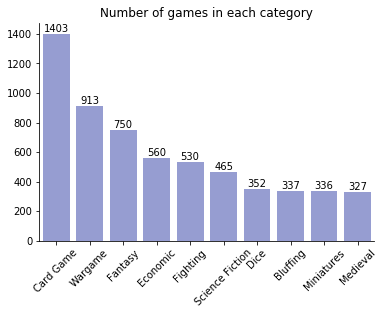

<IPython.core.display.Javascript object>

In [18]:
popcats = catsun.groupby("Category")["names"].count()
bar_ch(popcats, 10, "Number of games in each category", "", "", 45)
popcats = popcats[popcats > 150]

## In result
* Most popular genres for board game developement are Card Game, Wargame and Fantasy.

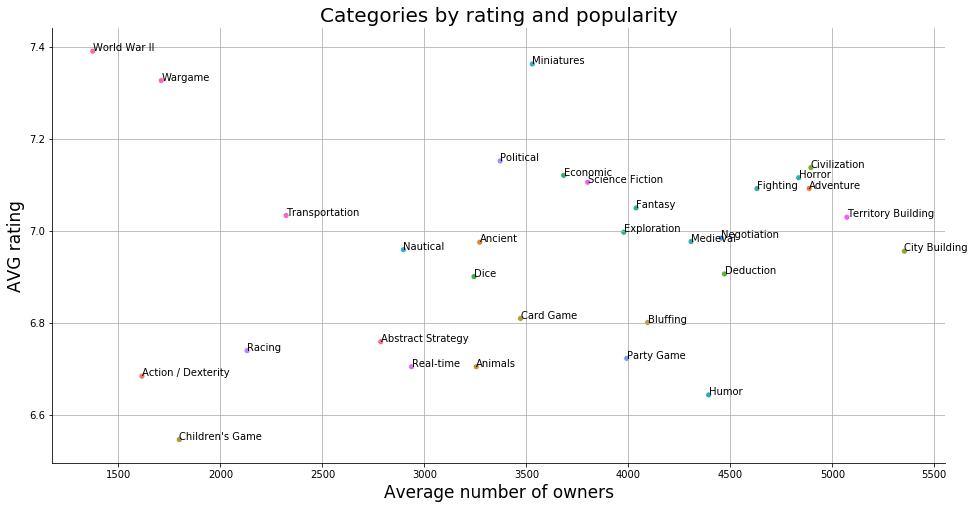

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(16, 8))
rait_cats = catsun.groupby("Category")["avg_rating"].mean()
own_cats = catsun.groupby("Category")["owned"].mean()
own_cats = own_cats[popcats.index]
rait_cats = rait_cats[popcats.index]
raiow = sns.scatterplot(own_cats, rait_cats, hue=popcats.index)
raiow.get_legend().remove()

raiow.spines["top"].set_visible(False)
raiow.spines["right"].set_visible(False)

raiow.grid(True)
raiow.set_xlabel("Average number of owners", fontsize=17)
raiow.set_ylabel("AVG rating", fontsize=17)
raiow.set_title("Categories by rating and popularity", size=20)

for txt in popcats.index.values:
    raiow.annotate(txt, (own_cats[txt], rait_cats[txt]))

## In result
* Players give higer marks to games realated with war (World War II, Wargame, Miniatures)
* Players prefere to buy games with Building (Territiory Building, City Building)
* Childrens, Action or Racing catgories are not best choice for board games.

Age limit for different categories:

In [20]:
age_cats = catsun.groupby("Category")["age"].mean()
age_cats = age_cats[popcats.index]
catage = pd.DataFrame(age_cats.sort_values(ascending=False))
catage.rename(columns={"age": "Age"}, inplace=True)
catage["Age"] = catage["Age"].apply(lambda x: round(x))
catage

,Age
Category,
Horror,12
Civilization,12
Political,12
Negotiation,12
Economic,12
Science Fiction,11
Transportation,11
Fighting,11
Adventure,11


<IPython.core.display.Javascript object>

#### Top 4 most used mechanics for each category

In [21]:
catmec = expsize(catsun[["Category", "mechanic"]], "mechanic", "Mechanic")

lbd = lambda x: x.value_counts().index[0]
lbd1 = lambda x: x.value_counts().index[1]
lbd2 = lambda x: x.value_counts().index[2]
lbd3 = lambda x: x.value_counts().index[3]
rencol = {"Mechanic": ""}
for cnu in range(0, 4):
    rencol["<lambda_" + str(cnu) + ">"] = "TOP " + str(cnu + 1)
catmec = catmec.groupby("Category").agg([lbd, lbd1, lbd2, lbd3])
catmec.rename(columns=rencol, inplace=True)
catmec.loc[popcats.index.values]

\
                                            TOP 1                   TOP 2   
Category                                                                    
Abstract Strategy                  Tile Placement           Grid Movement   
Action / Dexterity                           none            Dice Rolling   
Adventure                            Dice Rolling  Variable Player Powers   
Ancient                              Dice Rolling         Hand Management   
Animals                           Hand Management          Set Collection   
Bluffing                          Hand Management  Variable Player Powers   
Card Game                         Hand Management  Variable Player Powers   
Children's Game                      Dice Rolling                  Memory   
City Building                      Tile Placement         Hand Management   
Civilization        Area Control / Area Influence  Variable Player Powers   
Deduction                  Variable Player Powers            Partnerships   
Dice                                 Dice Rolling  Variable Player Powers   
Economic                          Auction/Bidding         Hand Management   
Exploration                         Modular Board            Dice Rolling   
Fantasy                    Variable Player Powers            Dice Rolling   
Fighting                   Variable Player Powers            Dice Rolling   
Horror                     Variable Player Powers            Dice Rolling   
Humor                             Hand Management  Variable Player Powers   
Medieval                          Hand Management            Dice Rolling   
Miniatures                           Dice Rolling  Variable Player Powers   
Nautical                             Dice Rolling          Set Collection   
Negotiation                Variable Player Powers         Hand Management   
Party Game                           Partnerships  Variable Player Powers   
Political           Area Control / Area Influence         Hand Management   
Racing                            Hand Management            Dice Rolling   
Real-time                       Co-operative Play     Pattern Recognition   
Science Fiction            Variable Player Powers            Dice Rolling   
Territory Building  Area Control / Area Influence          Tile Placement   
Transportation             Route/Network Building     Pick-up and Deliver   
Wargame                              Dice Rolling         Hex-and-Counter   
World War II                         Dice Rolling         Hex-and-Counter   

                                                   \
                                            TOP 3   
Category                                            
Abstract Strategy   Area Control / Area Influence   
Action / Dexterity            Pattern Recognition   
Adventure                           Modular Board   
Ancient             Area Control / Area Influence   
Animals                              Dice Rolling   
Bluffing                             Partnerships   
Card Game                           Card Drafting   
Children's Game               Pattern Recognition   
City Building                       Card Drafting   
Civilization                         Dice Rolling   
Deduction                         Hand Management   
Dice                              Hand Management   
Economic                         Worker Placement   
Exploration                Variable Player Powers   
Fantasy                           Hand Management   
Fighting                          Hand Management   
Horror                          Co-operative Play   
Humor                                Dice Rolling   
Medieval            Area Control / Area Influence   
Miniatures                          Modular Board   
Nautical                          Hand Management   
Negotiation                          Dice Rolling   
Party Game                                 Voting   
Political                            Dice Rolling   
Racing                   

<IPython.core.display.Javascript object>

## Mechanics

In [22]:
games["MechSize"] = games["mechanic"].apply(lambda x: len(x.split(",")))
mechsun = expsize(games, "mechanic", "Mechanic")
mechsun.head(3)

,rank,game_id,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,age,owned,category,designer,weight,CatSize,MechSize,Mechanic
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543,5,9,Action / Movement Programming
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543,5,9,Co-operative Play
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543,5,9,Grid Movement


<IPython.core.display.Javascript object>

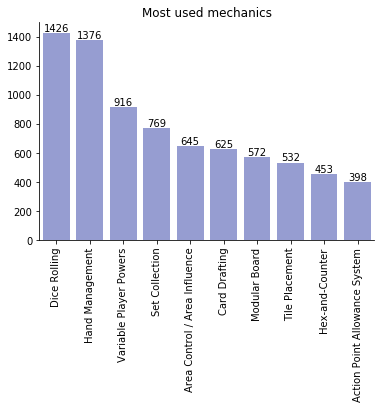

<IPython.core.display.Javascript object>

In [23]:
mechco = mechsun.groupby("Mechanic")["names"].count()

bar_ch(mechco, 10, "Most used mechanics", "", "", 90)
popcats = popcats[popcats > 150]

### In result
* Most used mechanics are Dice Rolling and Hand Management

### Amount of mechanics

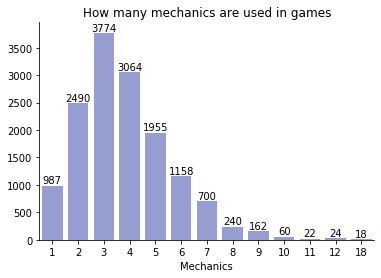

<IPython.core.display.Javascript object>

In [24]:
mechbarc = mechsun.groupby("MechSize")["names"].count()
bar_ch(
    mechbarc,
    100,
    "How many mechanics are used in games",
    "Mechanics",
    "",
    0,
    sort=False,
)
plt.show()

### In result
* Majority of developers create board games with 2-5 mechanics.

Geek ratiting dependence from number of mechanics. I use only amounts of mechanics where are more than 150 games.

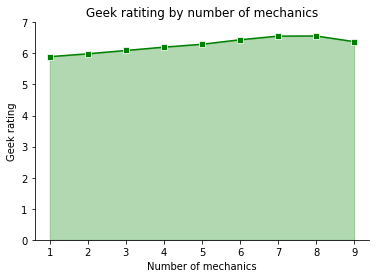

<IPython.core.display.Javascript object>

In [25]:
mechbarg = mechsun.groupby("MechSize")["geek_rating"].mean()
mechbarg = mechbarg[mechbarg.index < 10]
mngr = sns.lineplot(mechbarg.index, mechbarg, marker="s", color="green")
mngr.fill_between(mechbarg.index, mechbarg.values, color="green", alpha=0.3)
mngr.spines["top"].set_visible(False)
mngr.spines["right"].set_visible(False)
mngr.set_xlabel("Number of mechanics")
mngr.title.set_text("Geek ratiting by number of mechanics")
mngr.set_ylabel("Geek rating")
mngr.set_ylim([0, 7])
plt.show()

### In result
* Creating game with 7-8 mechanics can provide better Geek rating for game. But this increase is not very significant.
* With more than 8 mechanics game become overloaded.

### Longest and shortest mechanics

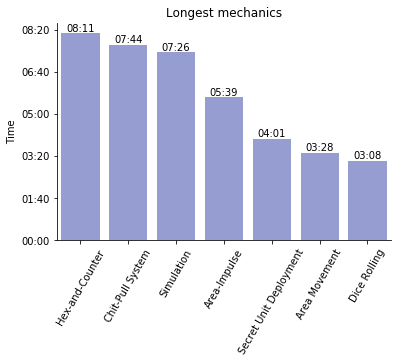

<IPython.core.display.Javascript object>

In [26]:
long_short = mechsun.groupby("Mechanic")["avg_time"].mean().sort_values(ascending=False)
long_short = long_short[long_short.index != "none"]
bar_ch(long_short, 7, "Longest mechanics", "", "Time", 60, roundc=True, time=True)

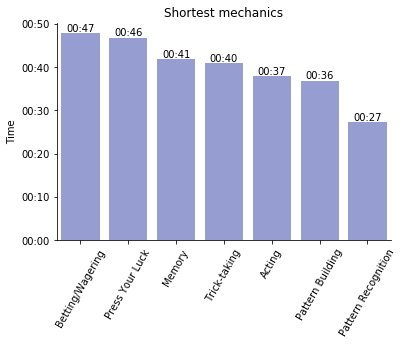

<IPython.core.display.Javascript object>

In [27]:
bar_ch(
    long_short.tail(7), 7, "Shortest mechanics", "", "Time", 60, roundc=True, time=True
)

In [28]:
long_short = long_short.apply(lambda x: pd.to_datetime(x, unit="m").strftime("%H:%M"))
long_short = pd.DataFrame(long_short)
long_short.rename(columns={"avg_time": "Time"}, inplace=True)
long_short

,Time
Mechanic,
Hex-and-Counter,08:11
Chit-Pull System,07:44
Simulation,07:26
Area-Impulse,05:39
Secret Unit Deployment,04:01
Area Movement,03:28
Dice Rolling,03:08
Crayon Rail System,03:07
Campaign / Battle Card Driven,03:02


<IPython.core.display.Javascript object>

### In result
* Shortest mechanics are mechanics with patterns (Pattern Building, Pattern Recognition) 
* Longest mechanics include creation of unique game experience (Hex-and-Counter, Area-Impulse, Area Movement)

### Mechanics by amount of players

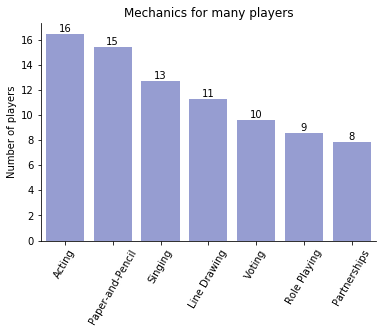

<IPython.core.display.Javascript object>

In [29]:
mechplay = (
    mechsun.groupby("Mechanic")["max_players"].mean().sort_values(ascending=False)
)
bar_ch(
    mechplay, 7, "Mechanics for many players", "", "Number of players", 60, roundc=True
)

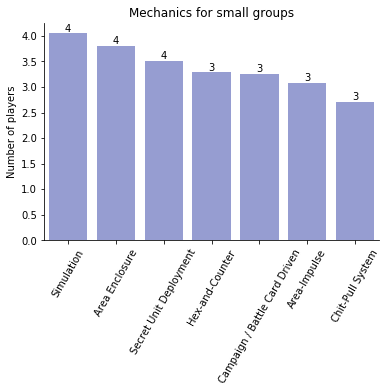

<IPython.core.display.Javascript object>

In [30]:
minmec = mechplay.tail(7)
bar_ch(
    minmec, 8, "Mechanics for small groups", "", "Number of players", 60, roundc=True
)

In [31]:
mechplc = pd.DataFrame(mechplay)
mechplc.rename(columns={"max_players": "Players"}, inplace=True)
mechplc["Players"] = mechplc["Players"].apply(lambda x: round(x))
mechplc = mechplc[mechplc.index != "none"]
mechplc

,Players
Mechanic,
Acting,16
Paper-and-Pencil,15
Singing,13
Line Drawing,11
Voting,10
Role Playing,9
Partnerships,8
Storytelling,8
Pattern Recognition,7


<IPython.core.display.Javascript object>

### In result:
* Most mechanics are used for 4-5 players games.
* Acting and Paper-and-Pencil mechanics are good for teams with 15+ members.
* Only Chit-Pull System mechanic is mostly used in duel games.

## Designers

In [32]:
games["GroupSize"] = games["designer"].apply(lambda x: len(x.split(",")))
groupsun = expsize(games, "designer", "Designer")
groupsun.head(3)

,rank,game_id,names,min_players,max_players,avg_time,year,avg_rating,geek_rating,age,mechanic,owned,category,weight,CatSize,MechSize,GroupSize,Designer
0,1,174430,Gloomhaven,1,4,120,2017,8.98893,8.61858,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",3.7543,5,9,1,Isaac Childres
1,2,161936,Pandemic Legacy: Season 1,2,4,60,2015,8.66140,8.50163,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical",2.8210,2,7,2,Rob Daviau
1,2,161936,Pandemic Legacy: Season 1,2,4,60,2015,8.66140,8.50163,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical",2.8210,2,7,2,Matt Leacock


<IPython.core.display.Javascript object>

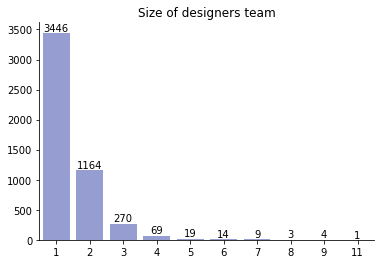

<IPython.core.display.Javascript object>

In [33]:
teamsz = games.groupby("GroupSize")["names"].count()
bar_ch(teamsz, 100, "Size of designers team", "", "", 0, sort=False)

### In result
* Board games designing is mostly done alone.

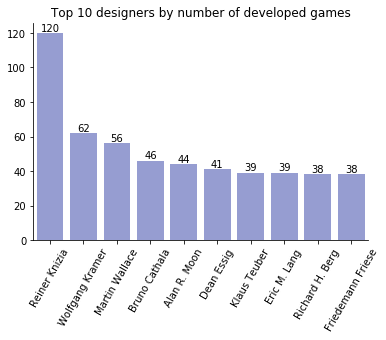

<IPython.core.display.Javascript object>

In [34]:
desprod = groupsun.groupby("Designer")["names"].count()
topdes = desprod.sort_values(ascending=False).drop(labels=["(Uncredited)"])

desbr = sns.barplot(topdes.head(10).index, topdes.head(10), color="#8C96DB")
desbr.spines["top"].set_visible(False)
desbr.spines["right"].set_visible(False)
desbr.title.set_text("Top 10 designers by number of developed games")
desbr.set_xlabel("")
desbr.set_ylabel("")
ypos = 0
for rect in topdes.head(10):
    plt.text(ypos, rect, s=rect, ha="center", va="bottom")
    ypos += 1
plt.xticks(rotation=60)
plt.show()

### Fresh man's vs experienced designers
This pie charts compares number of designers who developed only one board game and regular this area workers (more than one game). Second pie chart compares same things but only for designers whose games sold better than avearge.

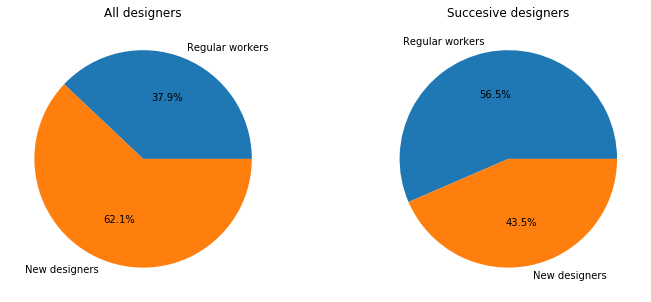

<IPython.core.display.Javascript object>

In [35]:
freshd = topdes[topdes == 1]
oldd = topdes[topdes != 1]
labels = "Regular workers", "New designers"
fig, piedev = plt.subplots(1, 2, figsize=(12, 5))
piedev[0].pie([oldd.size, freshd.size], autopct="%1.1f%%", labels=labels)
piedev[0].set_title("All designers")

drme = groupsun.groupby("Designer")["owned"].mean().drop(labels=["(Uncredited)"])
drme = drme[drme > drme.mean()]
sucdes = topdes.loc[drme.index.values]

freshs = sucdes[sucdes == 1]
olds = sucdes[sucdes != 1]
piedev[1].set_title("Succesive designers")
piedev[1].pie([olds.size, freshs.size], autopct="%1.1f%%", labels=labels)
plt.rcParams.update({"font.size": 12})
plt.show()

### In result
* Many designers in the board game area work do not work there constantly and use experience from other areas.
* It is not very important to have experienced game designer to make succesive game.

Next pie chart shows the percentage of designers who developed top 100 games working frist time in industry.

In [36]:
def firye(row, desbeg, alldes):
    if desbeg[row["Designer"]] == row["year"]:
        row["ExpierDes"] = 0
    else:
        nlv = alldes[
            (alldes["Designer"] == row["Designer"])
            & (alldes["year"] == desbeg[row["Designer"]])
        ]["ValNum"]
        row["ExpierDes"] = row["ValNum"] - nlv.iloc[0]
    return row


desbeg = groupsun.groupby("Designer")["year"].min()
gropdesort = groupsun.sort_values(by=["Designer", "year"], ascending=True)
gropdesort = gropdesort[
    (gropdesort["Designer"] != "(Uncredited)") & (gropdesort["Designer"] != "none")
]
gropdesort["ExpierDes"] = np.nan
gropdesort["ValNum"] = np.arange(len(gropdesort))
gropdesort = gropdesort.apply(lambda x: firye(x, desbeg, gropdesort), axis=1)
gropdesort.drop(columns=["ValNum"], inplace=True)

<IPython.core.display.Javascript object>

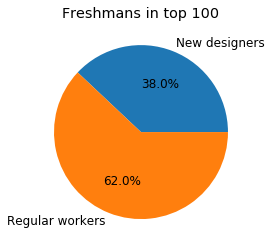

<IPython.core.display.Javascript object>

In [37]:
t100gwdes = gropdesort.sort_values(by=["owned"], ascending=False).head(158)
fig, axmp = plt.subplots()
frd = t100gwdes[t100gwdes["ExpierDes"] < 1].size
old = t100gwdes[t100gwdes["ExpierDes"] >= 1].size
axmp.title.set_text("Freshmans in top 100")

labels = "New designers", "Regular workers"
axmp.pie([frd, old], autopct="%1.1f%%", labels=labels)
plt.show()

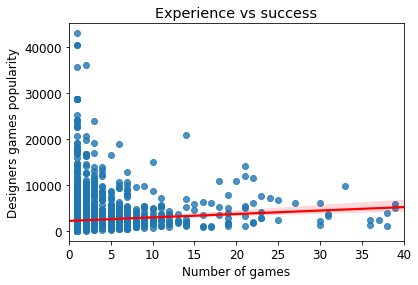

<IPython.core.display.Javascript object>

In [90]:
fig, axog = plt.subplots()
sns.regplot(
    groupsun.groupby("Designer")["names"].count(),
    groupsun.groupby("Designer")["owned"].mean(),
    ax=axog,
    line_kws={"color": "red"},
)
axog.set_xlim(0, 40)
axog.set_xlabel("Number of games")
axog.set_ylabel("Designers games popularity")
axog.title.set_text("Experience vs success")
plt.show()

### In result
* Best board games were made by beginers in this area.
* Gorw of average success exist but it is not sharp.

Next scatter plot shows the same idea but compares game pupularity with average experience of its designers.

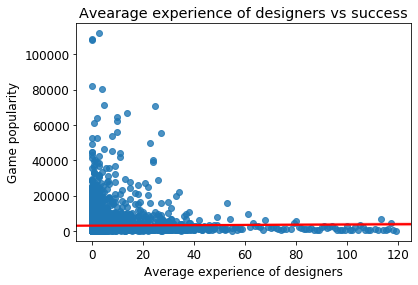

<IPython.core.display.Javascript object>

In [91]:
fig, axog = plt.subplots()
sns.regplot(
    gropdesort.groupby("names")["ExpierDes"].mean(),
    gropdesort.groupby("names")["owned"].mean(),
    ax=axog,
    line_kws={"color": "red"},
)
axog.set_xlabel("Average experience of designers")
axog.set_ylabel("Game popularity")
axog.title.set_text("Avearage experience of designers vs success")
plt.show()

## Age 

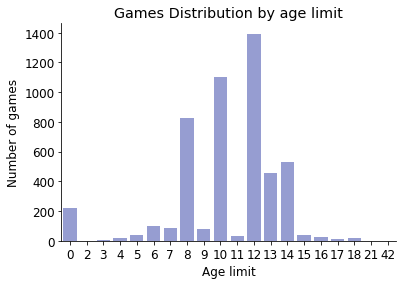

<IPython.core.display.Javascript object>

In [40]:
gmage = games.groupby("age")["owned"].count()
agelim = sns.barplot(gmage.index, gmage, color="#8C96DB")
agelim.spines["top"].set_visible(False)
agelim.spines["right"].set_visible(False)
agelim.set_xlabel("Age limit")
agelim.set_ylabel("Number of games")
agelim.title.set_text("Games Distribution by age limit")

## In result
* There are 3 main age limit categories for board games from 8, 10 and 12 years old.

## Weight and time

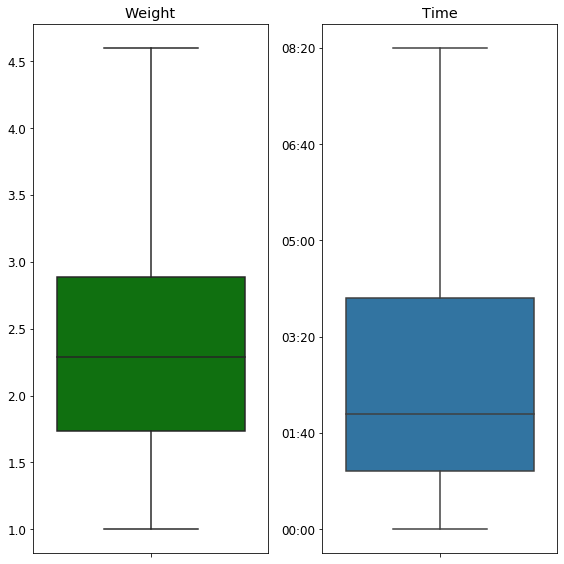

<IPython.core.display.Javascript object>

In [41]:
fig, boxwt = plt.subplots(1, 2, figsize=(8, 8))
gmwei = games["weight"]
sns.boxplot(y=gmwei, ax=boxwt[0], showfliers=False, color="green")
boxwt[0].set_ylabel("")
boxwt[0].title.set_text("Weight")

gmtim = games["avg_time"]
sns.boxplot(y=gmtim, ax=boxwt[1], showfliers=False)
boxwt[1].set_ylabel("")
boxwt[1].title.set_text("Time")
boxwt[1].set_yticklabels(pd.to_datetime(axty.get_yticks(), unit="m").strftime("%H:%M"))

plt.tight_layout()

### In result
* Average weight of board game is 2.3 kg.
* Average duration of board game session is 1h 45 min.

Comparasent:

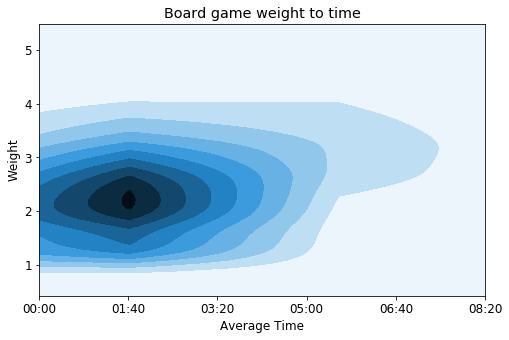

<IPython.core.display.Javascript object>

In [42]:
nor_wei = games[(games["avg_time"] > 0) & (games["weight"] > 0)]
fig, axet = plt.subplots(figsize=(8, 5))
jnwt = sns.jointplot("avg_time", "weight", data=nor_wei, kind="kde", ax=axet)
axet.set_xlim(0, 500)
axet.set_xticklabels(pd.to_datetime(axet.get_xticks(), unit="m").strftime("%H:%M"))
axet.title.set_text("Board game weight to time")
axet.set_xlabel("Average Time")
axet.set_ylabel("Weight")
plt.close()

### In result:
* Only long games (with duration more than 3 hours) become heavier with time.